## 영상정보처리 6주차 과제 템플리트
- 마감: 4월 16일 오후 11:59
- 점수: 10점 만점
- 이미지 경로 잘못 사용한 경우: -3

이름: 박민혁            
학번: 32151671



다음의 경로는 변경하지 말것

In [9]:
from google.colab import drive
drive.mount('/gdrive')

%cd /gdrive/MyDrive/Classroom/[영상정보처리] 2000004793-2021-1/Report Week 6
%ls ../

image_path = '../Dongkeun-OpenCV-ImgData/lena.jpg'

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/Classroom/[영상정보처리] 2000004793-2021-1/Report Week 6
'시험 공부'/               'Report Week 2'/  'Report Week 4'/  'Report Week 6'/
 Dongkeun-OpenCV-ImgData/  'Report Week 3'/  'Report Week 5'/


##문제 1: 5점


1. 주어진 영상을 읽어 들인다 (org_img)
2. 입력 영상과 같은 크기의 빈 컬러 이미지를 만든다 (new_image)
3. 공백 이미지(new_image) 를 2 x 2 로 분할하여 4개의 서브이미지 영역을 구분한다.
4. 오른쪽 위를 1 영역이라고 하고, 시계 방향으로 2, 3, 4 영역이라고 한다. 
5. 1영역은 blue channel 값만을 가지고, 2영역은 green channel, 3영역은 red channel 값만 가지고, 4 영역은 3개의 channel 이 merging 된 영상을 집어 넣는다.
6. new_image 를 출력한다. 





(512, 512, 3)


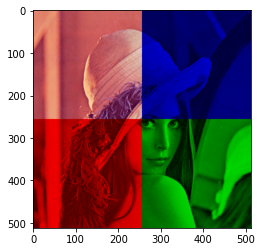

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 읽어오고 r, g, b 순서대로 바꿔주기
org_img = cv2.imread(image_path)
b, g, r = cv2.split(org_img)
org_img = cv2.merge((r, g, b))

# 원래 사진 형태 출력
print(org_img.shape)

# 같은 크기의 빈 컬러 이미지 만들기
new_image = np.zeros(org_img.shape, np.uint8)

# 아까 뽑아둔 b, g, r을 이용한다.
# 각각 subimage1 ~ 4
new_image[: int(y / 2), int(x / 2) : x, 2] = b[: int(y / 2), int(x / 2) : x]
new_image[int(y / 2) : y, int(x / 2) : x, 1] = g[int(y / 2) : y, int(x / 2) : x]
new_image[int(y / 2) : y, : int(x / 2), 0] = r[int(y / 2) : y, : int(x / 2)]
new_image[: int(y / 2), : int(x / 2)] = cv2.merge((r[: int(y / 2), : int(x / 2)], 
                                                   g[: int(y / 2), : int(x / 2)], b[: int(y / 2), : int(x / 2)]))

plt.imshow(new_image)
plt.show()


### 문제 2: 5점
강의자료 2021-1 ImgProc JB-CH05-Updated2103-JH.pdf 에 있는 예제 중, 07.bitwise_op.py 와 08.bitwise_overlap.py 의 예제를 이 노트북에서 실행시키고, 각 라인을 분석해서 자기 노트를 만들기. 
- 예제에 사용하는 이미지가 '../Dongkeun-OpenCV-ImgData' 폴더에 없는 경우, 공유한 소스코드 폴더에서 필요한 이미지를 '../Dongkeun-OpenCV-ImgData' 에 복사해서 사용할 것. 


07.bitwise_op.py

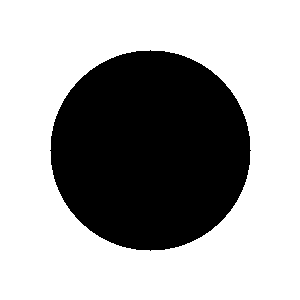

In [97]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


# 그릴 이미지를 300 x 300 모양으로 만들어준다. uint8은 unsigned int 8비트
image1 = np.zeros((300, 300), np.uint8)
# numpy 복사할 땐 반드시 copy()이용
image2 = image1.copy()
# y x 뽑아내기
h, w = image1.shape[:2]
# 중심 좌표
cx, cy = w//2, h//2

# 중심 좌표를 가지고 원 그리기
cv2.circle(image1, (cx, cy), 100, 255, -1)

# 절반은 흰색 절반은 검정색으로 채운다 -1은 채운다라는 의미
cv2.rectangle(image2, (0, 0, cx, h), 255, -1)

# 흰색 = 1 검정 = 0
# or (0, 0) = 0, (0, 1) or (1, 0) = 1, (1, 1) = 1 즉 한 곳만 흰색이어도 흰색이 그려진다.
image3 = cv2.bitwise_or(image1, image2)
# and (0, 0) = 0, (0, 1) or (1, 0) = 0, (1, 1) = 1 즉 두 곳 모두 흰색이어야 흰색이다.
image4 = cv2.bitwise_and(image1, image2)
# xor (0, 0) = 0, (0, 1) or (1, 0) = 1, (1, 1) = 0 즉 한 곳만 흰색이어야 흰색이다.
image5 = cv2.bitwise_xor(image1, image2)
# not 0 -> 1, 1 -> 0
image6 = cv2.bitwise_not(image1)

# 예제에 있는 그대로 쳤는데 오류가 나서 오류 검색해보니 cv2_imshow()를 이용해서 출력하라고 하는데 다 같이 출력하면 에러가 떠서 주석처리 했습니다.
# cv2_imshow(image1)
# cv2_imshow(image2)
# cv2_imshow(image3)
# cv2_imshow(image4)
# cv2_imshow(image5)
cv2_imshow(image6)

08.bitwise_overlap.py

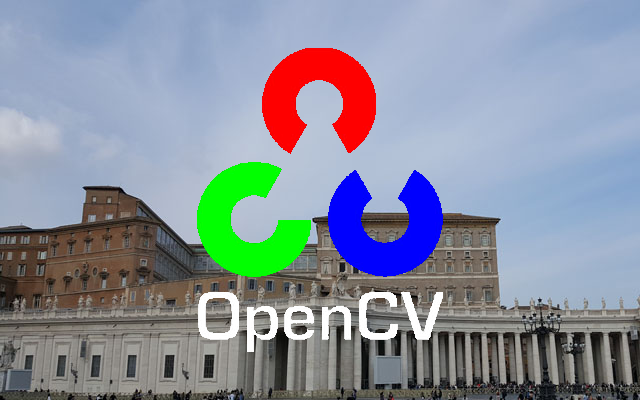

In [96]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# 이미지 읽어 오기
image = cv2.imread('../Dongkeun-OpenCV-ImgData/bit_test.jpg', cv2.IMREAD_COLOR)
logo = cv2.imread('../Dongkeun-OpenCV-ImgData/logo.jpg', cv2.IMREAD_COLOR)

# 이미지 읽기 오류처리
if image is None or logo is None:
  raise Exception("영상파일 읽기 오류")

# noise 제거
# Thresh해서 이진화(블랙, 화이트) 220 보다 크면 흰색, 220 보다 작으면 검정, max = 255, index가 붙은 이유는
# Threshhold는 return 값은 두개이다. 하나는 return - > true, false, 하나는 det - > color
# color masks
masks = cv2.threshold(logo, 220, 255, cv2.THRESH_BINARY)[1]

# 채널이 분리된 형태 masks
split_masks = cv2.split(masks)

# blue, green
fg_pass_mask = cv2.bitwise_or(split_masks[0], split_masks[1])
# sum(red), foreground
fg_pass_mask = cv2.bitwise_or(split_masks[2], fg_pass_mask)

# white - > black, black - > white, background
bg_pass_mask = cv2.bitwise_not(fg_pass_mask)

# 각각의 이미지 y, x 뽑아내기
(H, W), (h, w) = image.shape[:2], logo.shape[:2]
# 사각형의 시작 좌표 구하기
x, y = (W - w) // 2, (H - h) // 2
# 확대해서 보기 roi -> logo
roi = image[y : y + h, x : x + w]


# 배경은 검정색과 다른 부분은 원래 색을 가지고 있는 foreground 형성, mask와 and연산
foreground = cv2.bitwise_and(logo, logo, mask=fg_pass_mask)
# and mask 사용
# image의 사진을 배경으로 아까 흰색 배경에 검정이었던 bg_pass_mask를 배경위에 올린다.
background = cv2.bitwise_and(roi, roi, mask = bg_pass_mask)

# 그 두개를 합치면 백그라운드에서 검정색이었던 부분이 원래색으로 돌아옴
dst = cv2.add(background, foreground)
# 그것을 원래의 이미지에 넣어준다.
image[y : y + h, x : x + w] = dst


# cv2_imshow(background)
# cv2_imshow(foreground)
# cv2_imshow(dst)
cv2_imshow(image)
